In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 6 - 3  # Random values between -3 and 3
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # Sinusoidal data with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


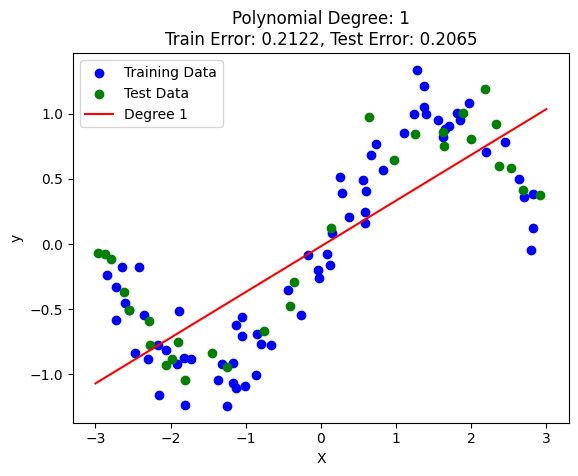

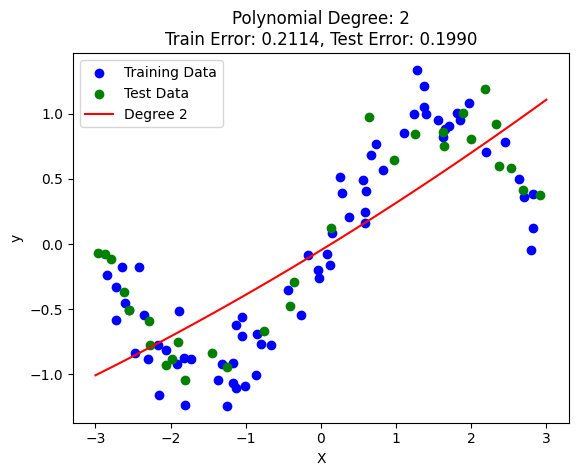

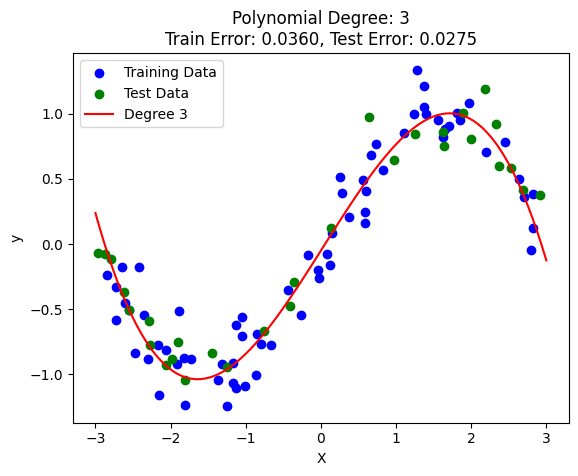

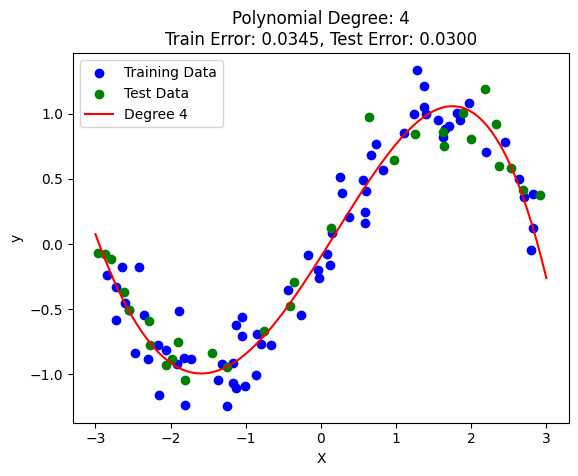

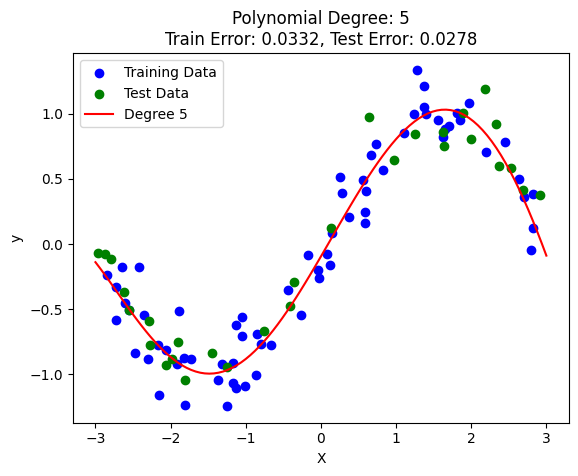

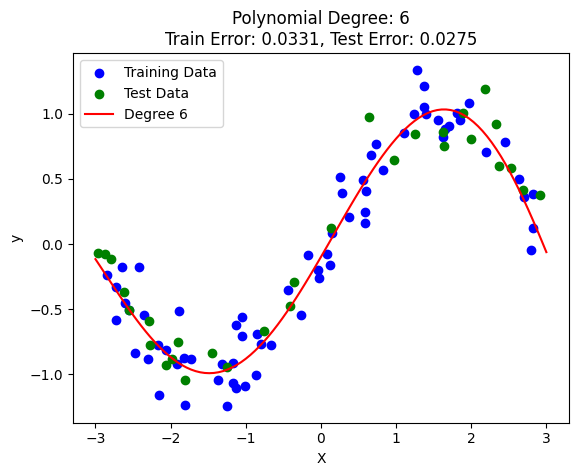

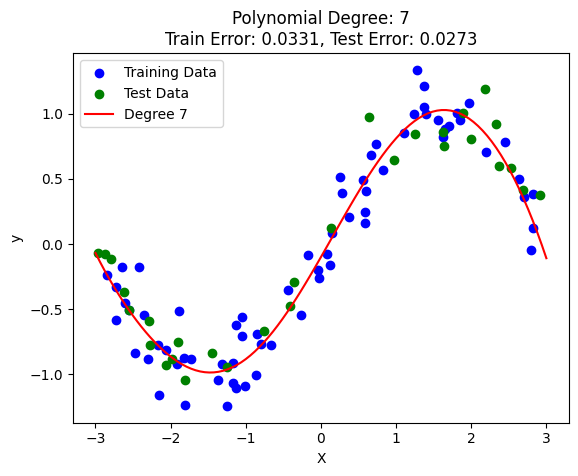

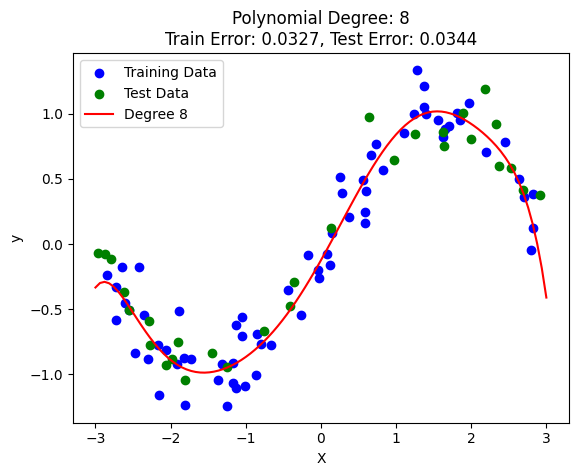

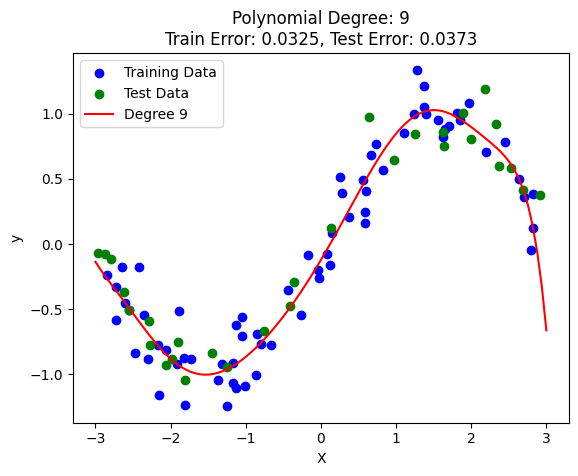

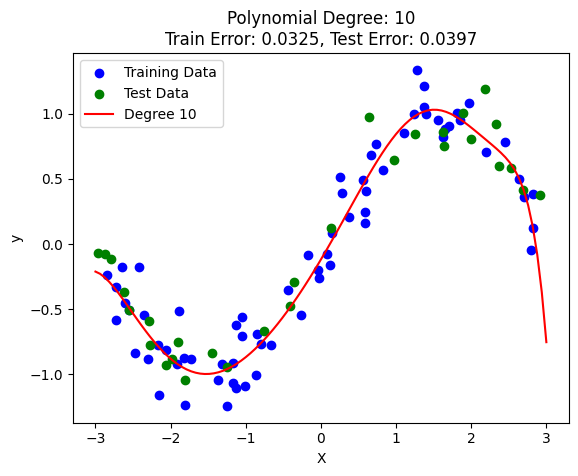

In [2]:
def plot_polynomial_regression(degree, X_train, y_train, X_test, y_test):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate training and testing errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Visualization
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='green')

    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, y_plot, label=f'Degree {degree}', color='red')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f'Polynomial Degree: {degree}\nTrain Error: {train_error:.4f}, Test Error: {test_error:.4f}')
    plt.legend()
    plt.show()

    return train_error, test_error

# Plot models of varying complexity
train_errors, test_errors = [], []
degrees = range(1, 11)

for degree in degrees:
    train_error, test_error = plot_polynomial_regression(degree, X_train, y_train, X_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)


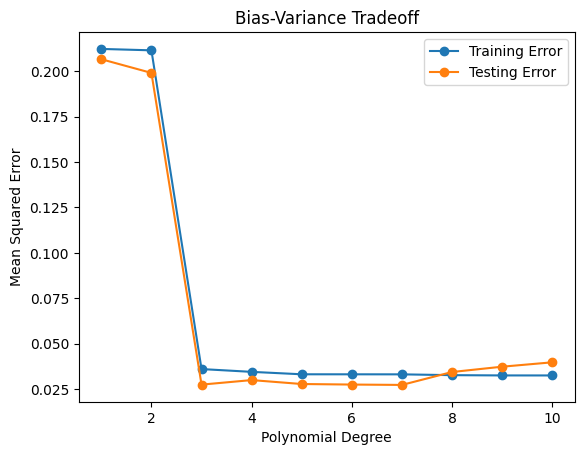

In [3]:
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()
